In [2]:
# Import libraries
import pandas as pd

In [4]:
# Load dataset
dataset = pd.read_csv("dataset.csv")
dataset.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [6]:
# Summarize dataset
dataset.shape

(10, 2)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [10]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [24]:
# Segregate dataset into x and y
x = dataset.iloc[:,0].values.reshape(-1,1)
y = dataset.iloc[:,-1].values

In [26]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [28]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [30]:
# Train dataset using linear regression
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression()
modelLR.fit(x,y)

LinearRegression()

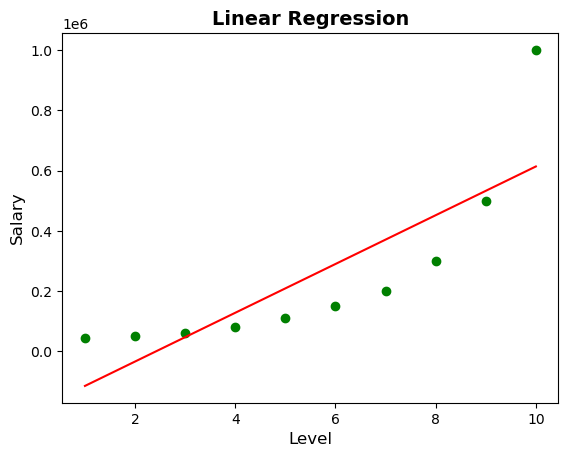

In [60]:
# Visualize the linear regression model
import matplotlib.pyplot as plt

plt.scatter(x,y,color='green')
plt.plot(x,modelLR.predict(x), color='red')
plt.title("Linear Regression", weight='bold', fontsize=14)
plt.xlabel("Level", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.show()

In [94]:
# Convert x to polynomial format(x^n)
from sklearn.preprocessing import PolynomialFeatures

modelP = PolynomialFeatures(degree=4)
xpoly = modelP.fit_transform(x)

In [96]:
# Train same linear regression with x-polynomial instead of x 
modelPLR = LinearRegression()
modelPLR.fit(xpoly,y)

LinearRegression()

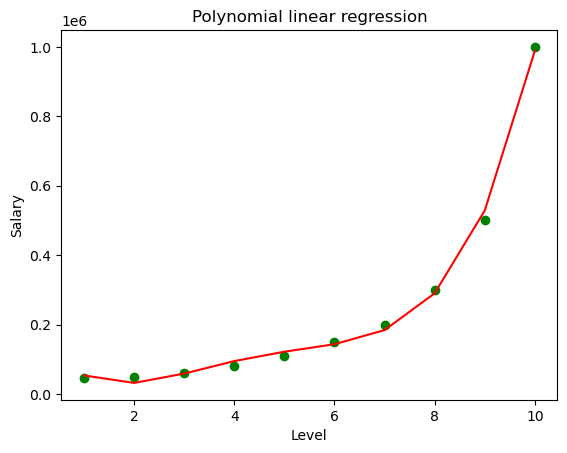

In [98]:
# Visualizing polynomial regression results 
plt.scatter(x,y, color='green')
plt.plot(x,modelPLR.predict(xpoly),color='red')
plt.title("Polynomial linear regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

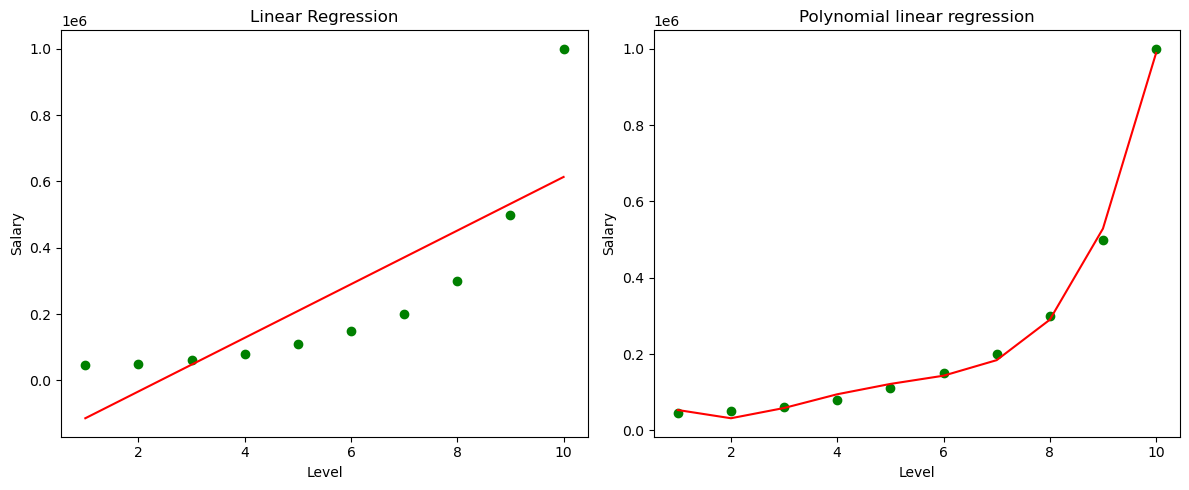

In [106]:
# Visualize the difference between linear regression and polynomial linear regression
plt.figure(figsize=(12,5))

# Linear Regression
plt.subplot(1,2,1)
plt.scatter(x,y,color='green')
plt.plot(x,modelLR.predict(x), color='red')
plt.title("Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")

# Polynomial linear regression
plt.subplot(1,2,2)
plt.scatter(x,y, color='green')
plt.plot(x,modelPLR.predict(xpoly),color='red')
plt.title("Polynomial linear regression")
plt.xlabel("Level")
plt.ylabel("Salary")

plt.tight_layout()
plt.show()

In [110]:
# Predicting using polynomial regression
x = 8.5
salarypred = modelPLR.predict(modelP.transform([[x]]))
salarypred

array([387705.69274458])